# Intro

This notebook is intended to walk through basic data manipulation operations with Pandas and scikit-learn. After completing this exercise, you will know:

1. How to read csv data to file
2. How to do basic aggregations
3. How to print basic data summary operations
4. How to plot basic information about the data


# Technical imports

In [1]:
import pandas as pd               # basic data manipulation tool
import numpy as np                # numerical operations tool
import matplotlib.pyplot as plt   # plotting and visualiztion tool

In [2]:
%matplotlib inline

# Reading data to csv file

First of all we need to load our data to some variable, from csv file

In [59]:
data = pd.read_csv("./titanic_train_data.csv",)

In [4]:
# A quick glimpse on the dataset

data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# General data information

Set of operations to display summary information about our dataset

In [5]:
data. ... # data type information as well as not-null count

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
data. ... # More detailed information about numerical columns

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
... data.Sex # Calculate value counts for Sex variable

male      577
female    314
Name: Sex, dtype: int64

We can print multiple statistics for numerical columns

In [8]:
print("Age mean:", data. ... )
print("Age standard deviation:", data. ... )
print("Age quantiles:\n\n", data. ... )

Age mean: 29.69911764705882
Age standard deviation: 14.526497332334044
Age quantiles:

 0.20    19.0
0.50    28.0
0.75    38.0
Name: Age, dtype: float64


# Basic data operations

## Basic operations on columns

All operations on columns are **vectorized** - it means that each function can be written in terms of single value but will be executed **on all elements of column** one-by-one. 

Syntax for calling such functions is the following:

```python

    data.COLUMN.apply(function)    
    
```


Simple example of adding value to age column:

In [9]:
def add_10(age):
    return age + 10

data.Age. ...

0      32.0
1      48.0
2      36.0
3      45.0
4      45.0
5       NaN
6      64.0
7      12.0
8      37.0
9      24.0
10     14.0
11     68.0
12     30.0
13     49.0
14     24.0
15     65.0
16     12.0
17      NaN
18     41.0
19      NaN
20     45.0
21     44.0
22     25.0
23     38.0
24     18.0
25     48.0
26      NaN
27     29.0
28      NaN
29      NaN
       ... 
861    31.0
862    58.0
863     NaN
864    34.0
865    52.0
866    37.0
867    41.0
868     NaN
869    14.0
870    36.0
871    57.0
872    43.0
873    57.0
874    38.0
875    25.0
876    30.0
877    29.0
878     NaN
879    66.0
880    35.0
881    43.0
882    32.0
883    38.0
884    35.0
885    49.0
886    37.0
887    29.0
888     NaN
889    36.0
890    42.0
Name: Age, Length: 891, dtype: float64

You can use so called **lambda** shortcut - an inline function defined and executed in the same line.

Syntax looks as follows:

```python

    object.apply(lambda arg: operation)

```

Where 

> **lambda** - keyword meaning an *inline function*

> **arg** - argument to the function. *Single value* - subsequent vector elmenets will be passed there one-by-one


In [10]:
# A shortcut notation:

data.Age. ...

0      32.0
1      48.0
2      36.0
3      45.0
4      45.0
5       NaN
6      64.0
7      12.0
8      37.0
9      24.0
10     14.0
11     68.0
12     30.0
13     49.0
14     24.0
15     65.0
16     12.0
17      NaN
18     41.0
19      NaN
20     45.0
21     44.0
22     25.0
23     38.0
24     18.0
25     48.0
26      NaN
27     29.0
28      NaN
29      NaN
       ... 
861    31.0
862    58.0
863     NaN
864    34.0
865    52.0
866    37.0
867    41.0
868     NaN
869    14.0
870    36.0
871    57.0
872    43.0
873    57.0
874    38.0
875    25.0
876    30.0
877    29.0
878     NaN
879    66.0
880    35.0
881    43.0
882    32.0
883    38.0
884    35.0
885    49.0
886    37.0
887    29.0
888     NaN
889    36.0
890    42.0
Name: Age, Length: 891, dtype: float64

## Basic operations on axes

Apart from operating only on column or single values, you can operate on whole dataframes -per row or per column.

Let's check the following example:

In [11]:
df = pd.DataFrame({
    'a': [1,2,3], 
    'b': [4,5,6],
    'c': [7,8,9]})

df

,a,b,c
0,1,4,7
1,2,5,8
2,3,6,9


You can apply built-in operations per row. General syntax is as follows:

```python

    df.sum(axis=1)

```

*Axis=1* means: **apply function to each row!**

In [12]:
df.sum(axis=1)

0    12
1    15
2    18
dtype: int64

You can use the same syntax to apply function for each column:

```python

    df.sum(axis=0)
    

```

In [13]:
df.sum(axis=0)

a     6
b    15
c    24
dtype: int64

You can define your own functions, that operate on rows/columns. Syntax is very similar to what we've had before.

```python

def my_function(row_or_column):
    # do something
    return new_value

df.apply(my_function, axis=0)
df.apply(my_function, axis=1)



```

Example:

let's write a function that will add only even numbers:

In [14]:
def add_only_even_numbers(row_or_column):
    return row_or_column[row_or_column % 2 == 0].sum()

df.apply(add_only_even_numbers, axis=0)

a     2
b    10
c     8
dtype: int64

In [15]:
df.apply(add_only_even_numbers, axis=1)

0     4
1    10
2     6
dtype: int64

## Basic data aggregations and grouping

Grouping operations usually take form of:


```{python}

data.groupby(COLUMN(s)).OPERATION
```

In [16]:
# Group by sex and count number of people

data[["Sex", "Age"]]. ...

Sex
female    314
male      577
dtype: int64

In [17]:
# Group by sex and calculate mean age

data[["Sex", "Age"]]. ...

,Age
Sex,
female,27.915709
male,30.726645


You can perform multiple aggregation operations in the same time, using the following syntax:

```{python}

data.groupby(COLUMNS).agg({
        'col1': [functions],
        'col2': [functions],
        ....
        'coln': [functions]
})

```

In [18]:
# Group by sex and calculate both - number of records and mean age.

data.groupby("Sex") ...

Age             Sex
             mean        std size
Sex                              
female  27.915709  14.110146  314
male    30.726645  14.678201  577

# Basic plotting

In Jupyter notebook you do a lot of plots and illustrations that enrich your data analysis process. You have at least two options for plotting:

> use Pandas built-in tools
    
    This interface is a litte restricted, but allows you to do plotting very quickly
    
    
> use Matplotlib library
    
    This interface is much more advanced, but requires also a lot of learning. It is useful for doing real research and plotting serious scientific results




## Histograms

Histograms present distribution of your data - how many times given range of values (called *a bucket*) are present in your data. Histograms are used to depict shape of the distribution 

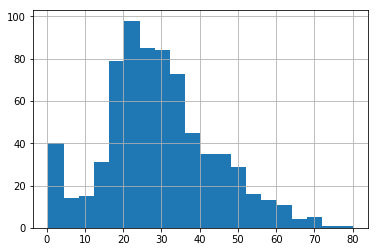

In [19]:
# Let's do a simple plot of age distribution for Titanic dataset:

data.Age.hist(bins=20)

We can see, that most of the passengers were between 20-35 years old. We have also many older people (40+) - a long "*tail*" in distribution

By controlling number of bins you can control how granular is your plot.

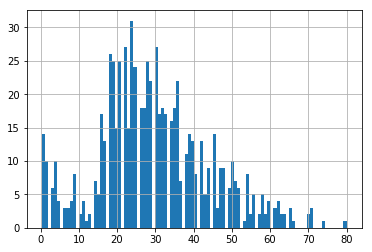

In [20]:
data.Age.hist(bins=100)

## Scatter plots

Scatter plots allow you to plot two variables against each other, to check how they are aligned. One of the variables is plotted on x axis, second on y axis.

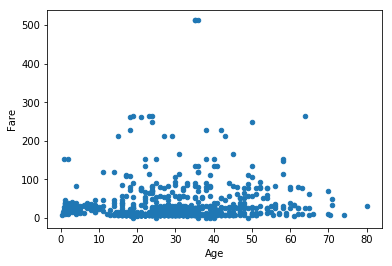

In [21]:
data.plot(x='Age', y='Fare', kind='scatter')

This plot is useful for eyeballing if two variables are somehow aligned and can influence each other.

## Boxplots

This plot is intended to show difference between groups. It shows the **spread and distribution** of **continuous variables** across **different groups**.

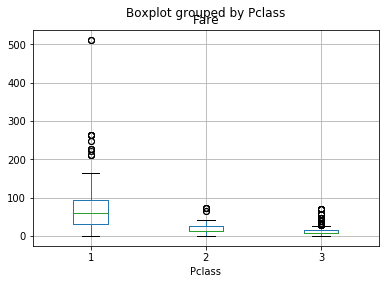

In [22]:
data.boxplot(column='Fare', by='Pclass')

Interpretaion of the plot is as follows:

- line in the middle: median value
- lower / upper part of the box: 25th and 75th quantile
- upper / lower whisker - min/max value excluding outliers
- points above/below - extremally outlying observations (more/less than 3/2 of upper quantiles)

## Pie plot

This plot is usefull to show proportions of one value against the other. Although many statisticians don't like it, it might be usefull for wider audience

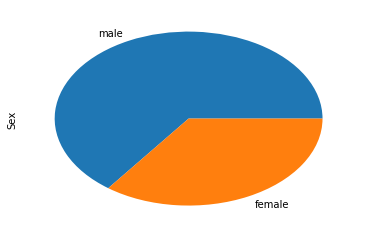

In [23]:
# Plot proportion of males to females in Titanic dataset

data.Sex.value_counts().plot(kind='pie')

# Data preparation for machine learning

Below you can find coule of excercises showing basic operations needed for machine learning algorithms to operate. 
Those operations don't make much sense, but they will be neccessary later on

## Binarization

Machine learning algorithms written in Sklearn cannot operate on text (discrete) data - they require numerical values. There is a good reason for that: every discrete data can be represented numerically and the opposite direction does not hold.

Binarization is a process of building vector of size equal to number of unique values for attribute. Then flag **1** is placed for each row, where attribute has given value.

Example - original table:

| id | Occupation |
|----|------------|
| 1  | developer          |
| 2  | developer          |
| 3  | admin          |
| 4  | researcher          |


Binarized version:


| id | Occupation developer | Occupation admin | Occupation researcher |
|----|----------------------|------------------|-----------------------|
| 1  | 1                    | 0                |  0                     |
| 2  | 1                    | 0                 | 0                     |
| 3  | 0                   | 1                |    0                   |
| 4  | 0                   | 0                |    1                   |

Binarization can be done very easily, calling a function:

```{python}

pd.get_dummies( dataframe)

```

Let's pick **Embarked** column to binarize - it is textual and it has 4 distinct values with no clear order or numerical equivalent. Let's check it quickly - unique values:

In [33]:
data.Embarked. ...

array(['S', 'C', 'Q', nan], dtype=object)

Fill missing values with question mark and check unique values again:

In [34]:
data.Embarked.fillna( .... )
data.Embarked. ...

array(['S', 'C', 'Q', '?'], dtype=object)

Now we can make a binarization

In [37]:
embarked_binarized = pd.get_dummies( ... )
embarked_binarized.head(5)

,?,C,Q,S
0,0,0,0,1
1,0,1,0,0
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


Original data again:

In [38]:
data.Embarked.head(5)

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object

You can use this procedure on any kind of textual (discrete) data. 

## Separting X and Y variables

Separation of dependent and independent variables is very important. They form two distinct datasets:

1. X data - independent varibales (called also predictors) used to **predict** dependent values
2. Y data - dependent variables. This is what you're trying to **predict**

We believe that Y is a function of X:

$$ \forall (y_i, x_i) \in D: y_i = f(x_i) $$

Therefore we need to separate them.

Operation is very simple.

Using our current example, **Survived** is our **Y** variable and the rest are X's. So we can do the following:

In [39]:
Y = data. ...
X = data. ...

Data separated in this way shares primary keys (index). This is important, as we want to have a connection between those two datasets

In [41]:
all(Y.index == X.index)

True

## Train-test splitting

Once we have our X and Y variables, we want to split them into training and testing. We do this because of the reasons described during our lectures: train algorithm on a separate dataset and then check it's performance on test set.


All required functions and tools are stored in a library called:

```{python}

sklearn.model_selection

```


We have several ways to achieve that:

In [42]:
import sklearn.model_selection as modsel

### Static split

We can split our data only once and then keep training on newly created dataset. It's a good practice to include **random seed** when building experiments, to ensure, that other researchers will have the same results as you do.

In [44]:
X_train, X_test, Y_train, Y_test = modsel. ...

In [46]:
X_train.shape, X_test.shape

((712, 11), (179, 11))

In [47]:
all(X_train.index == Y_train.index)

True

In [48]:
all(X_test.index == Y_test.index)

True

### K-fold cross validation

Because of strong randomization it's better to divide a dataset into train/test parts several times and check **average** performance.

Every time we do the same thing as in case of static split - just divide into training-testing.

In [49]:
kfold = modsel.KFold(n_splits=3)

Now we can iterate possible splits -remember to use **iloc** to access observations, because they are based on indices!

In [53]:
count = 0

In [54]:
for train_index, test_index in kfold.split(X, Y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    
    count += X_test.shape[0]

In [55]:
count

891

In the end - we end up with all observations being at least once in a test set :) And that's the goal :)

In [58]:
count == X.shape[0]

True